# ● Load and Explore the data (3 points)

## 1. Import the required libraries and read the dataset. (1 point)

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler, LabelEncoder
from scipy import stats
from scipy.stats import zscore
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

In [2]:
# reading the CSV file into pandas dataframe
df = pd.read_csv("TelcomCustomer-Churn.csv")
dfc = df.copy()

## 2. Check the first few samples, shape, info of the data and try to familiarize yourself with different features. (2 points)

In [3]:
# Check the first few samples
df.sample(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
4315,9019-QVLZD,Female,0,No,No,1,Yes,No,Fiber optic,No,...,No,No,Yes,No,Month-to-month,No,Electronic check,79.55,79.55,Yes
6374,1293-BSEUN,Female,0,Yes,Yes,72,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Mailed check,20.70,1482.3,No
3735,3489-HHPFY,Female,0,Yes,No,2,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Electronic check,84.05,134.05,No
6671,5090-EMGTC,Female,0,Yes,No,59,Yes,No,Fiber optic,No,...,No,Yes,Yes,Yes,Two year,Yes,Mailed check,100.05,6034.85,No
4846,8993-IZEUX,Male,0,No,No,7,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,No,Bank transfer (automatic),69.15,488.65,No
1459,3070-BDOQC,Female,0,No,No,60,Yes,No,Fiber optic,No,...,Yes,No,Yes,Yes,Two year,Yes,Electronic check,99.65,5941.05,No
1539,5071-FBJFS,Female,0,Yes,Yes,4,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,No,Electronic check,50.30,217.1,No
5900,0117-LFRMW,Male,0,Yes,Yes,37,No,No phone service,DSL,Yes,...,Yes,No,No,No,Month-to-month,No,Bank transfer (automatic),40.20,1448.8,Yes
2728,6402-SSEJG,Female,0,No,No,25,No,No phone service,DSL,Yes,...,Yes,No,Yes,Yes,One year,No,Electronic check,61.05,1540.2,No
4471,2479-BRAMR,Male,1,Yes,No,41,Yes,Yes,Fiber optic,Yes,...,Yes,No,No,No,Month-to-month,Yes,Bank transfer (automatic),83.75,3273.55,Yes


In [4]:
#  shape
df.shape  #7043 rows and 21 columns

(7043, 21)

In [5]:
# info of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


In [7]:
df.describe(include=object).T

,count,unique,top,freq
customerID,7043,7043,7590-VHVEG,1
gender,7043,2,Male,3555
Partner,7043,2,No,3641
Dependents,7043,2,No,4933
PhoneService,7043,2,Yes,6361
MultipleLines,7043,3,No,3390
InternetService,7043,3,Fiber optic,3096
OnlineSecurity,7043,3,No,3498
OnlineBackup,7043,3,No,3088
DeviceProtection,7043,3,No,3095


# ● Data Cleaning and Exploratory Data Analysis (16 points)

## 3. Check the percentage of missing values in each column of the data frame. Drop the missing values if there are any (2 points)

In [8]:
#Approach: 1
df.isnull().sum()/len(df)*100

customerID          0.0
gender              0.0
SeniorCitizen       0.0
Partner             0.0
Dependents          0.0
tenure              0.0
PhoneService        0.0
MultipleLines       0.0
InternetService     0.0
OnlineSecurity      0.0
OnlineBackup        0.0
DeviceProtection    0.0
TechSupport         0.0
StreamingTV         0.0
StreamingMovies     0.0
Contract            0.0
PaperlessBilling    0.0
PaymentMethod       0.0
MonthlyCharges      0.0
TotalCharges        0.0
Churn               0.0
dtype: float64

In [9]:
# Approach: 2
def check_missing_value(df):
    ''' Function to check missing values in the dataframe'''
    print("Percentage of missing value in each column:\n", df.isnull().sum()/len(df)*100)
    
check_missing_value(df)

Percentage of missing value in each column:
 customerID          0.0
gender              0.0
SeniorCitizen       0.0
Partner             0.0
Dependents          0.0
tenure              0.0
PhoneService        0.0
MultipleLines       0.0
InternetService     0.0
OnlineSecurity      0.0
OnlineBackup        0.0
DeviceProtection    0.0
TechSupport         0.0
StreamingTV         0.0
StreamingMovies     0.0
Contract            0.0
PaperlessBilling    0.0
PaymentMethod       0.0
MonthlyCharges      0.0
TotalCharges        0.0
Churn               0.0
dtype: float64


In [10]:
# Find the total number of missing value
df.isnull().sum().sum()

0

In [11]:
# Drop the missing value
df.dropna(inplace=True)

## 4. Check if there are any duplicate records in the dataset? If any drop them (2)

In [12]:
#Duplicate records (Quick check):
df.duplicated().sum()

0

In [13]:
# Checking number of duplicate records by function:
def check_duplicate_data(df):
    duplicate = df[df.duplicated()]
    return duplicate

duplicate = check_duplicate_data(df)
duplicate

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


**We can observe that along all 21 columns there is no duplicate records**

## 5. Drop the columns which you think redundant for the analysis (2 points)

In [14]:
# Checking info again
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [15]:
df.drop(['customerID'], inplace=True, axis=1)


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


## 6. Encode the categorical variables (2 points)

In [17]:
# Encode the categorical variable with LabelEncoder:
object_type_variable = [i for i in df.columns if df.dtypes[i] == object]
object_type_variable

le = LabelEncoder()

def encoder(df):
    for i in object_type_variable:
        q = le.fit_transform(df[i].astype(str))
        df[i] = q
        df[i] = df[i].astype(int)
        
encoder(df)
df.head(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,2505,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1466,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,157,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1400,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,925,1


In [18]:
# Encoder(another way)
# numerical_columns = df.select_dtypes(include=np.number).columns.tolist()
# categorical_columns = df.select_dtypes(include=object).columns.tolist()

# print("Numerical columns: ", numerical_columns)
# print('~'*50)
# print("Categorical columns: ", categorical_columns)
# print('~'*50)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   int32  
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   int32  
 3   Dependents        7043 non-null   int32  
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   int32  
 6   MultipleLines     7043 non-null   int32  
 7   InternetService   7043 non-null   int32  
 8   OnlineSecurity    7043 non-null   int32  
 9   OnlineBackup      7043 non-null   int32  
 10  DeviceProtection  7043 non-null   int32  
 11  TechSupport       7043 non-null   int32  
 12  StreamingTV       7043 non-null   int32  
 13  StreamingMovies   7043 non-null   int32  
 14  Contract          7043 non-null   int32  
 15  PaperlessBilling  7043 non-null   int32  
 16  PaymentMethod     7043 non-null   int32  


## 7. Perform a detailed univariate, bivariate, and multivariate analysis with appropriate plots and add detailed comments after each analysis. (8 points)

In [20]:
# #7: Univariate, Bivariate, Multivariate Analysis:
df2 = df.select_dtypes(include=np.number).describe().T
df2

,count,mean,std,min,25%,50%,75%,max
gender,7043.0,0.504756,0.500013,0.00,0.0,1.00,1.00,1.00
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
Partner,7043.0,0.483033,0.499748,0.00,0.0,0.00,1.00,1.00
Dependents,7043.0,0.299588,0.458110,0.00,0.0,0.00,1.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
PhoneService,7043.0,0.903166,0.295752,0.00,1.0,1.00,1.00,1.00
MultipleLines,7043.0,0.940508,0.948554,0.00,0.0,1.00,2.00,2.00
InternetService,7043.0,0.872923,0.737796,0.00,0.0,1.00,1.00,2.00
OnlineSecurity,7043.0,0.790004,0.859848,0.00,0.0,1.00,2.00,2.00
OnlineBackup,7043.0,0.906432,0.880162,0.00,0.0,1.00,2.00,2.00


<Axes: >

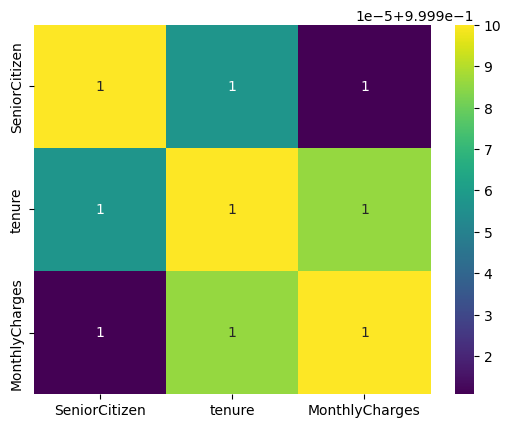

In [21]:
dfc2 = dfc.select_dtypes(include=np.number).describe()
sns.heatmap(dfc2.corr(), annot=True, cmap='viridis')

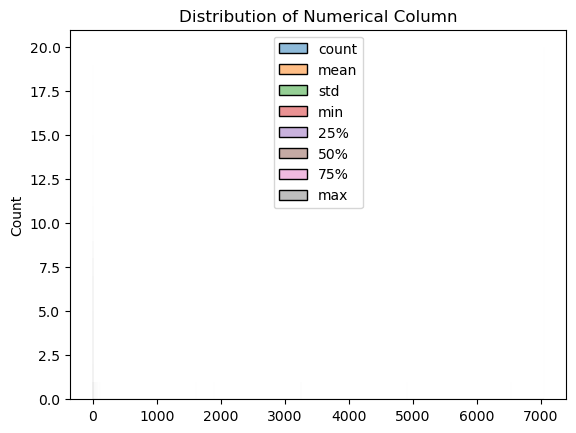

In [22]:
# Univariate analysis focuses on exploring one variable at a time.
sns.histplot(df2)
plt.title('Distribution of Numerical Column')
plt.show()

<Axes: xlabel='tenure', ylabel='DeviceProtection'>

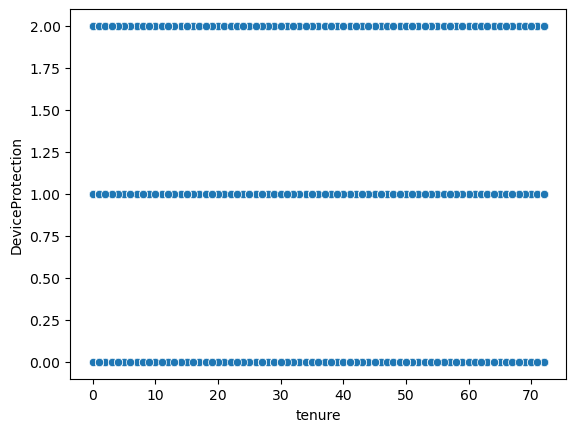

In [23]:
# Bivariate analysis explores the relationship between two variables.
sns.scatterplot(x='tenure',y='DeviceProtection', data=df)



<Axes: xlabel='tenure', ylabel='DeviceProtection'>

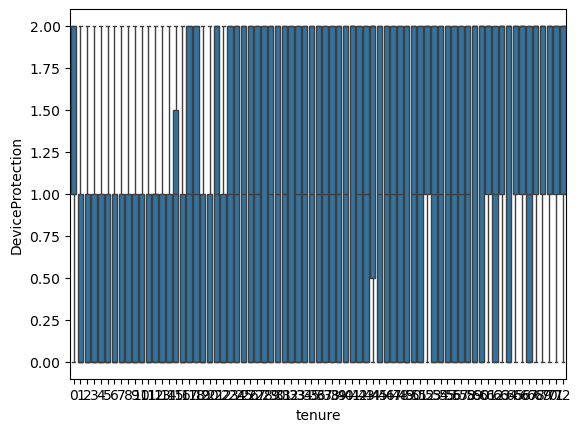

In [24]:
sns.boxplot(x='tenure',y='DeviceProtection', data=df)



In [25]:
# Multivariate analysis involves exploring the relationship between more than two variables.
# sns.pairplot(df)



<Axes: ylabel='count'>

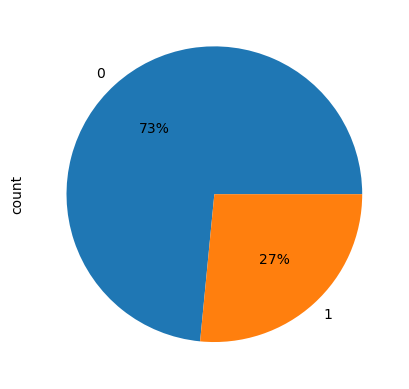

In [26]:
df['Churn'].value_counts().plot(kind='pie', autopct='%1.0f%%')

We can see that in churn no is greater than yes that mean 27% customer has left within one month

[]

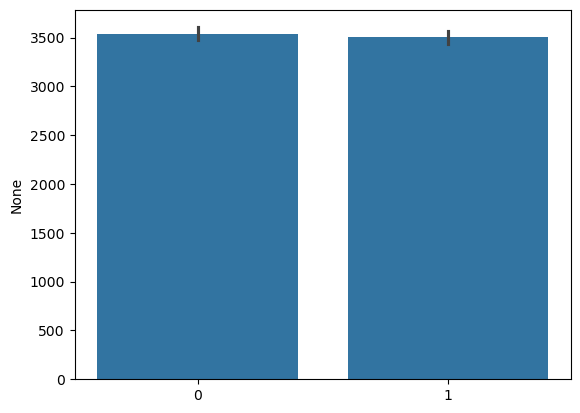

In [27]:
sns.barplot(x = df['gender'].values, y = df['gender'].index)
plt.plot()

here "0" is for female and "1" is for male. we can see that there is almost equal gender with a little bit higher no of females in the custonmers

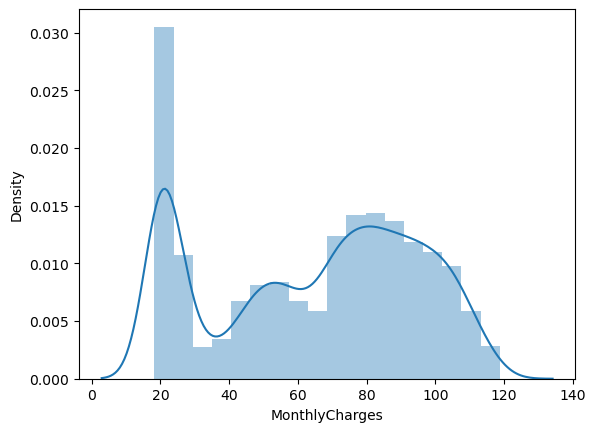

In [28]:
sns.distplot(df['MonthlyCharges'])
plt.show()

The monthly charge amount is at peak around 20 and then it is almost continous in 75-85 

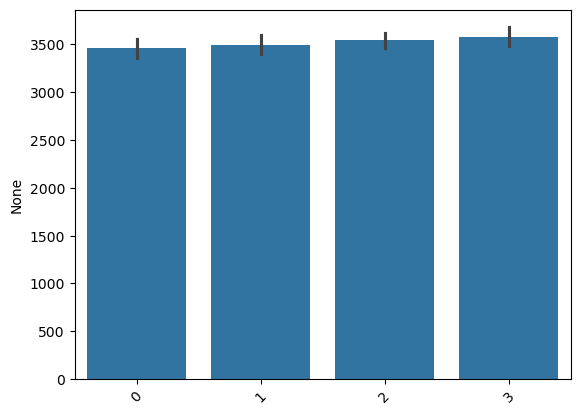

In [29]:
sns.barplot(x = df['PaymentMethod'].values, y = df['PaymentMethod'].index)
plt.xticks(rotation=45)
plt.show()

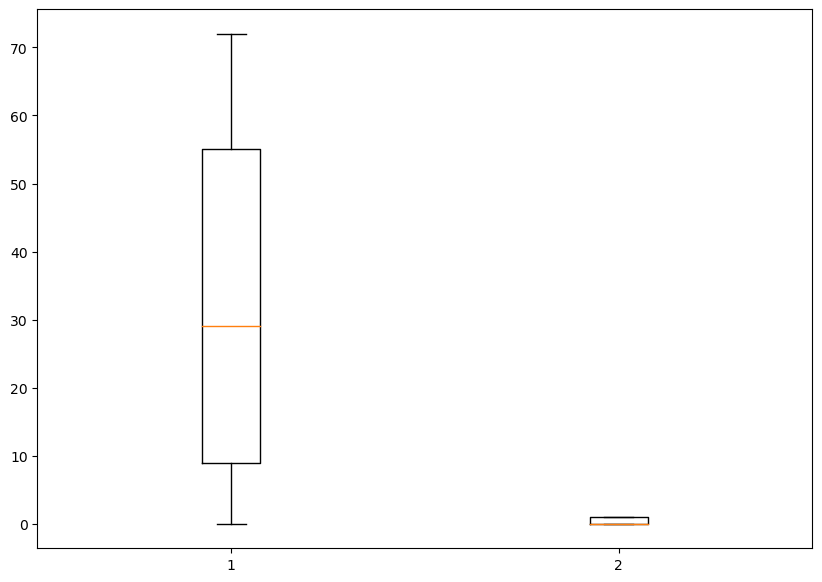

In [30]:
ds1 = df['tenure']
ds2 = df['Churn']
ds = [ds1,ds2]

figure, ax = plt.subplots(figsize=(10, 7))
bp = ax.boxplot(ds)

plt.show()

# ● Data Preparation for model building (6 points

## 8. Store the target column (i.e. Churn) in the y variable and the rest of the columns in the X variable (2 points)

In [31]:
print(df.columns)



Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


In [32]:
X = df.drop('Churn', axis=1)
y = df['Churn']

## 9. Split the dataset into two parts (i.e. 70% train and 30% test) (2 points)

In [33]:
# Split the dataset into 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

# Print the shapes of the train and test data
print("Shape of X_train and X_test:", X_train.shape, X_test.shape)
print("Shape of y_train and y_test:", y_train.shape, y_test.shape)

Shape of X_train and X_test: (4930, 19) (2113, 19)
Shape of y_train and y_test: (4930,) (2113,)


## 10. Standardize the columns using z-score scaling approach (2 points)

In [34]:
std_scaler = StandardScaler()

X_train = std_scaler.fit_transform(X_train)
X_test = std_scaler.fit_transform(X_test)

In [37]:
print(X_train[:5])

[[ 0.97793108 -0.43518364 -0.95516237 -0.65971632  0.56907976  0.3322053
   1.12200211  0.17906668 -0.92389967  1.24430418  1.24692237 -0.91730322
   1.16351634 -1.1054762   0.38168186  0.82064337 -0.54140857  1.02252308
   0.28042694]
 [-1.02256694  2.2978805   1.04694242 -0.65971632  1.34518046  0.3322053
   1.12200211  0.17906668 -0.92389967  1.24430418  1.24692237 -0.91730322
   1.16351634  1.15640289  0.38168186  0.82064337  0.39612015  1.40170982
   1.19709469]
 [ 0.97793108 -0.43518364 -0.95516237 -0.65971632  0.97755381  0.3322053
   1.12200211  0.17906668  1.40058381  1.24430418 -1.02775932 -0.91730322
  -1.09881281 -1.1054762  -0.82144574  0.82064337  0.39612015  0.73855063
   0.501234  ]
 [-1.02256694 -0.43518364  1.04694242 -0.65971632 -0.32956317  0.3322053
  -0.99005226 -1.16871765 -0.92389967  1.24430418 -1.02775932 -0.91730322
   1.16351634  1.15640289 -0.82144574  0.82064337 -1.47893729  0.17227617
  -1.14473398]
 [ 0.97793108 -0.43518364  1.04694242 -0.65971632 -0.942

# ● Model Building and Evaluation (25 points)

## 11. Write a function. (8 points)
## - ii) Fit the model with the train data.
## - iii) Make predictions on the test set.
## - iv) Returns the Accuracy Score

In [45]:
def model_function(model, X_train, X_test, y_train, y_test):
    """
    Train the model, fit the model with train data,make predictions and return accuracy score
    
    Parameters:
    - model: The machine learning model to be trained and evaluated.
    - X_train: The features of the training set.
    - X_test: The features of the testing set.
    - y_train: The features of the target training set.
    - y_test: The features of the target testing set.
    
    Returns:
    - accuracy: The accuracy score of the model on the test set.
    """
    #Fitting the model
    model.fit(X_train, y_train)
    
    #make prediction
    y_pred = model.predict(X_test)
    
    #Return the accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    return accuracy

## 12. Use the function and train a Logistic regression, KNN, and Naive Bayes,Decision tree, Random forest, Boosting and Stacking Classifier models and make predictions on test data. (8 points)

In [42]:
##Load all the model
lr = LogisticRegression()
kn = KNeighborsClassifier()
nb = GaussianNB()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
ab = AdaBoostClassifier()
gb = GradientBoostingClassifier()

In [48]:
result = pd.DataFrame(columns = ['Accuracy'])

for model, model_name in zip([lr,kn,nb,dt,rf,ab,sc], 
                             ['Logistic Regression', 'Knn', 'Naive Bayes', 'decision tree',
                              'random forest', 'ada boost', 'gradient boost']):
    accuracy = model_function(model, X_train, X_test, y_train, y_test)
    result.loc[model_name] = accuracy


In [50]:
Stacked_model = StackingClassifier(estimators= [
    ('logreg', lr),
    ('knn', kn),
    ('naive Bayes', nb),
    ('decision tree', dt),
    ('random forest', rf),
    ('ada boost', ab),
    ('gradient boost', gb)
], final_estimator = LogisticRegression())

Stacked_model.fit(X_train, y_train)

Stacked_pred = Stacked_model.predict(X_test)

Accuracy_score = accuracy_score(y_test, Stacked_pred)

## 13. Display and compare all the models designed with their test accuracies.(4)

In [53]:
# Displaying accuracy of all the model except stack
result

,Accuracy
Logistic Regression,0.805963
Knn,0.745386
Naive Bayes,0.758164
decision tree,0.726929
random forest,0.791765
ada boost,0.810696
gradient boost,0.812115


In [52]:
print('Accuracy score of stack classifier is: ', Accuracy_score)

Accuracy score of stack classifier is:  0.8135352579271179


## 14. Select the final best trained model along with your detailed comments for selecting this model. (3 points)

 * The stacking classifier is the best-performing model based on accuracy. The accuracy score of 0.8135 indicates the proportion of correctly classified instances, making it a suitable metric for evaluation.

#### Comments for selecting the stacking classifier as the final best-trained model:

- **Ensemble Approach:** The stacking classifier combines the predictions of multiple base models, taking advantage of the diverse strengths of each model. This ensemble approach often leads to improved performance compared to individual models.

- **Higher Accuracy:** The stacking classifier achieved the highest accuracy score (0.8135) among all the models, suggesting that it provides the most accurate predictions on the given dataset.

- **Robustness:** Ensemble methods, such as stacking, are generally more robust to overfitting and can generalize well to new data. This makes the stacking classifier a reliable choice for making predictions on unseen data.

In summary, the stacking classifier is selected as the final best-trained model due to its higher accuracy and the inherent benefits of ensemble learning in terms of combining diverse models for improved performance.


## 15. Write your conclusion on the results.(2 points)

* In conclusion, the results of the model evaluation and training indicate that the stacking classifier outperformed individual models, including logistic regression, KNN, Naive Bayes, decision tree, random forest, and boosting algorithms (Ada Boost and Gradient Boost). The accuracy scores were as follows:

     - Stacking Classifier: 0.8135
     - Logistic Regression: 0.8059
     - Ada Boost: 0.8107
     - Gradient Boost: 0.8121
     - Random Forest: 0.7918
     - Naive Bayes: 0.7582
     - KNN: 0.7454
     - Decision Tree: 0.7269
     
* The stacking classifier demonstrated the highest accuracy, making it the preferred model for this particular dataset. The ensemble approach employed by stacking, which combines the strengths of various models, contributed to its superior performance.

* It is important to note that accuracy is just one metric, and depending on the specific characteristics and requirements of the problem, other metrics like precision, recall, or F1-score may be considered for a more comprehensive evaluation.

* In practical terms, the stacking classifier can be considered a reliable choice for making predictions on similar datasets or in scenarios where a high level of accuracy is a priority. However, further analysis and consideration of domain-specific factors may be necessary to ensure the suitability of the chosen model for real-world applications.

**NOTE:** Python-Lab-03 is same refer this also